In [41]:
#Breast cancer detection	Feature scaling, accuracy	sklearn.datasets.load_breast_cancer

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import DataLoader,TensorDataset

In [43]:
bc=load_breast_cancer()
X=bc.data
y=bc.target
#print(bc.target_names)
#print(bc.feature_names)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)



In [44]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32)
train_dataset=TensorDataset(X_train_tensor,y_train_tensor)
test_dataset=TensorDataset(X_test_tensor,y_test_tensor)
train_loaders=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loaders=DataLoader(test_dataset,batch_size=32,shuffle=True)

In [45]:
class Brest_cancer_detection(nn.Module):
    def __init__(self,input_size,hiddensize1,hiddensize2,outputsize):
        super().__init__()
        self.inputlayer=nn.Linear(input_size,hiddensize1)
        self.hiddenlayer=nn.Linear(hiddensize1,hiddensize2)
        self.outputlayer=nn.Linear(hiddensize2,outputsize)
        self.relu=nn.ReLU()
    def forward(self,X):
        X=self.inputlayer(X)
        X=self.relu(X)
        X=self.hiddenlayer(X)
        X=self.relu(X)
        X=self.outputlayer(X)
        return X
        


In [46]:
print(X.shape)
print(y.shape)
input_size=30
hiddensize1=128
hiddensize2=64
outputsize=1
model=Brest_cancer_detection(input_size,hiddensize1,hiddensize2,outputsize)
criterion=nn.BCEWithLogitsLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
print(y_test_tensor)

(569, 30)
(569,)
tensor([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 1., 0., 1., 1., 0.])


In [ ]:
model.train()
epochs_no=40
for epochs in range(epochs_no):
    running_loss=0
    for inputs,labels in train_loaders:
        optimizer.zero_grad()
        outputs=model(inputs)
        labels=labels.unsqueeze(1)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"epoch {epochs+1},loss:{running_loss/len(train_loaders)}")
   



epoch 1,loss:0.000622540891360283
epoch 2,loss:0.0006062639062292874
epoch 3,loss:0.0006003339075202045
epoch 4,loss:0.0005625967489322648
epoch 5,loss:0.000557265183791363
epoch 6,loss:0.0005139529366895583
epoch 7,loss:0.00048792914791799075
epoch 8,loss:0.0004973100858478574
epoch 9,loss:0.000669080538500566
epoch 10,loss:0.00044360776507043436
epoch 11,loss:0.00045081387501978064
epoch 12,loss:0.00043023326458448233
epoch 13,loss:0.00039507693266690086
epoch 14,loss:0.0003741558733452166
epoch 15,loss:0.0004109616624191403
epoch 16,loss:0.00035102704756961124
epoch 17,loss:0.0003284240944722683
epoch 18,loss:0.000342337795397422
epoch 19,loss:0.0003100341309391297
epoch 20,loss:0.0003098292718580827
epoch 21,loss:0.0003118579605143168
epoch 22,loss:0.00029208237260718305
epoch 23,loss:0.00027453242873889396
epoch 24,loss:0.0002670995851682771
epoch 25,loss:0.0002576160936465991
epoch 26,loss:0.00025629410241284254
epoch 27,loss:0.00024340012654041251
epoch 28,loss:0.000235305312689

In [68]:
model.eval()
with torch.no_grad():
    all_labels=[]
    all_preds=[]
    for inputs,labels in test_loaders:
        outputs=model(inputs)
        #labels=(labels>0.5).int().squeeze()
        probs=torch.sigmoid(outputs)
        preds =(probs > 0.1).int().squeeze()
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.int().numpy())
assert len(all_preds) == len(all_labels)   
acc = accuracy_score(all_labels, all_preds)
print(" Accuracy:", acc)
print('classification_report\n',classification_report(all_labels,all_preds))
print('confusion matrix\n',confusion_matrix(all_labels,all_preds))

 Accuracy: 0.9824561403508771
classification_report
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion matrix
 [[41  2]
 [ 0 71]]


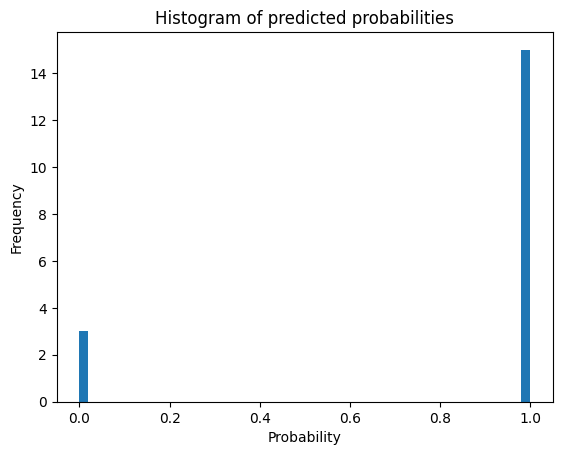

In [64]:
import matplotlib.pyplot as plt

plt.hist(probs, bins=50)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()
